In [49]:
import numpy as np
import scipy.optimize as resol
import scipy.integrate as integr
import matplotlib.pyplot as plt
import time

### Constantes du problème 

In [50]:
a, b, I_ns,I_s, tau = 0.95, 0.4, 0.59,0.6, 11 # I_ns : sans stimulation, I_s : avec stimulation

### Méthodes utiles à la résolution du problème 

In [51]:
# Fonction f du problème de Cauchy

def A(y,t):
    return np.array([y[0]-y[0]**3/3 - y[1] + I, (y[0] + a -b*y[1])/tau])


# Calcul du point d'équilibre en fonction de I
def find_equi_point(I):
    roots = np.polynomial.polynomial.polyroots([a/b-I, 1/b-1, 0, 1/3])
    
    root = 0
    
    for r in roots:
        if r.imag == 0:
            root = r
    
    return [root.real, (root.real+a)/b]

# I-  Première approche du problème 

## Solution avec les méthodes Python du problème sans stimulation 

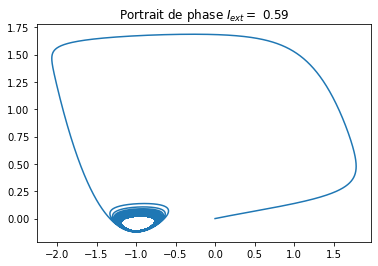

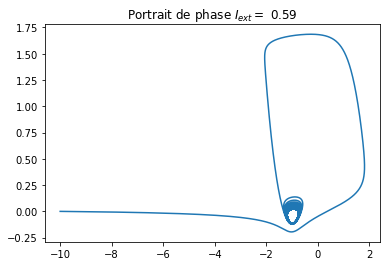

In [52]:
def A(y,t):
    return np.array([y[0]-y[0]**3/3 - y[1] + I_ns, (y[0] + a -b*y[1])/tau])
    
T = np.arange(0,10000,0.01)
X = integr.odeint(A, np.array([0,0]), T)


plt.plot(X[ :,0], X[ :,1])
plt.title("Portrait de phase $I_{ext} = $ " + str(I_ns))
plt.show()

T = np.arange(0,10000,0.01)
X = integr.odeint(A, np.array([-10,0]), T)

plt.plot(X[ :,0], X[ :,1])
plt.title("Portrait de phase $I_{ext} = $ " + str(I_ns))
plt.show()

### Approche du point d'équilibre

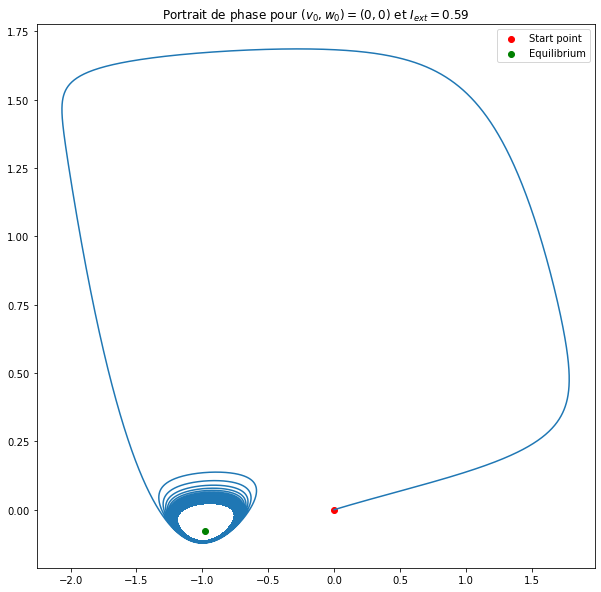

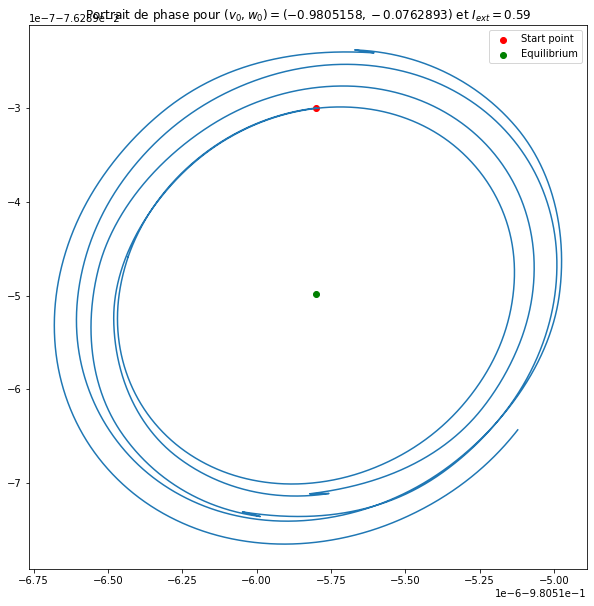

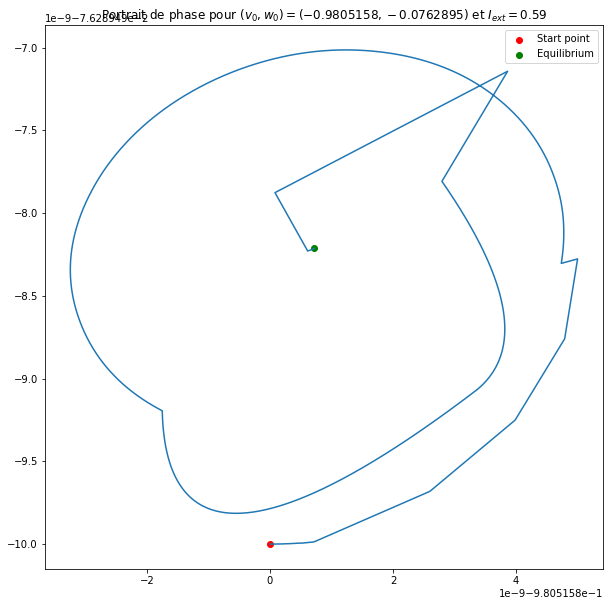

In [75]:
equi_point_ns = find_equi_point(I_ns)
T = np.arange(0,10000,0.01)
X = integr.odeint(A, np.array([-0.9805158,-0.0762893]), T)
X = integr.odeint(A, [0, 0], T)


plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1])
plt.scatter(0, 0, color='red', label='Start point')
plt.scatter(equi_point_ns[0], equi_point_ns[1], color='green', label='Equilibrium')
plt.title("Portrait de phase pour $(v_0,w_0)= (0,0)$ et $I_{ext}=$" +str(I_ns))
plt.legend()
plt.show()

T = np.arange(0,100,0.01)
start_point_1 = [-0.9805158,-0.0762893]
X = integr.odeint(A, np.array(start_point_1), T)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1])
plt.scatter(start_point_1[0], start_point_1[1], color='red', label='Start point')
plt.scatter(equi_point_ns[0], equi_point_ns[1], color='green', label='Equilibrium')
plt.title("Portrait de phase pour $(v_0,w_0)= (-0.9805158,-0.0762893)$ et $I_{ext}=$" +str(I_ns))
plt.legend()
plt.show()

T = np.arange(0,10000,0.01)
start_point_2 = [-0.9805158,-0.0762895]
X = integr.odeint(A, np.array(start_point_2), T)

plt.figure(figsize=(10,10))
plt.plot(X[ :,0], X[ :,1])
plt.scatter(start_point_2[0], start_point_2[1], color='red', label='Start point')
plt.scatter(equi_point_ns[0], equi_point_ns[1], color='green', label='Equilibrium')
plt.title("Portrait de phase pour $(v_0,w_0)= (-0.9805158,-0.0762895)$ et $I_{ext}=$" +str(I_ns))
plt.legend()
plt.show()

## Problème python avec stimulation 

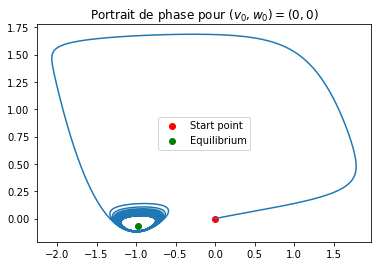

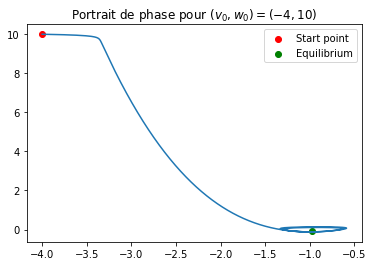

In [54]:
# Pourquoi est ce que l'on utilise pas I ici ? 
equi_point_s = find_equi_point(I_s)
T = np.arange(0,1000,0.01)
X = integr.odeint(A, np.array([0,0]), T)

plt.plot(X[ :,0], X[ :,1])
plt.scatter(0,0, color='red', label='Start point')
plt.scatter(equi_point_s[0], equi_point_s[1], color='green', label='Equilibrium')
plt.title("Portrait de phase pour $(v_0,w_0) = (0,0)$")
plt.legend()
plt.show()

T = np.arange(0,100,0.01)
X = integr.odeint(A, np.array([-4,10]), T)


plt.plot(X[ :,0], X[ :,1])
plt.scatter(-4,10, color='red', label='Start point')
plt.scatter(equi_point_s[0], equi_point_s[1], color='green', label='Equilibrium')
plt.title("Portrait de phase pour $(v_0,w_0) = (-4,10)$")
plt.legend()
plt.show()

# II - Etude du comportement des valeurs propres en fonction de $I_{ext}$ : 

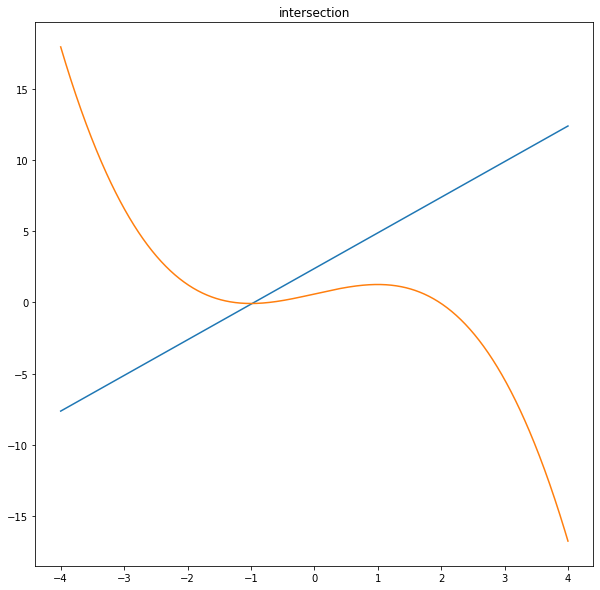

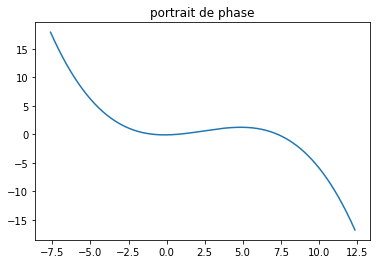

In [74]:
# faire varier I 
I = 0.59

def f1(v):
    return (v+a)/b

def f2(v, I):
    return I + v - v**3/3

plt.figure(figsize=(10,10))

x = np.linspace(-4,4,1000)
plt.plot(x, f1(x))
plt.plot(x, f2(x, I))
plt.title('intersection')
plt.show()

plt.plot(f1(x),f2(x,I))
plt.title("portrait de phase")
plt.show()

## Points d'équilibre selon les valeurs de $I_{ext}$ :

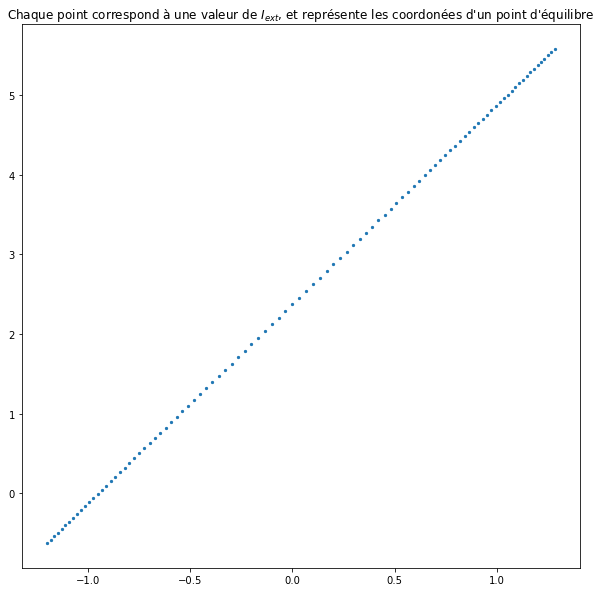

In [56]:
X = np.linspace(-4,4,1000)
I_range = np.linspace(0, 5, 100)
equi_points = []

for I in I_range:
    equi_points.append(find_equi_point(I))

equi_points = np.array(equi_points) 

plt.figure(figsize=(10,10))
plt.scatter(equi_points[:, 0], equi_points[:, 1], s=5)
plt.title("Chaque point correspond à une valeur de $I_{ext}$, et représente les coordonées d'un point d'équilibre")
plt.show()

## Partie réelle des valeurs propres de $J$ selon $I_{ext}$:

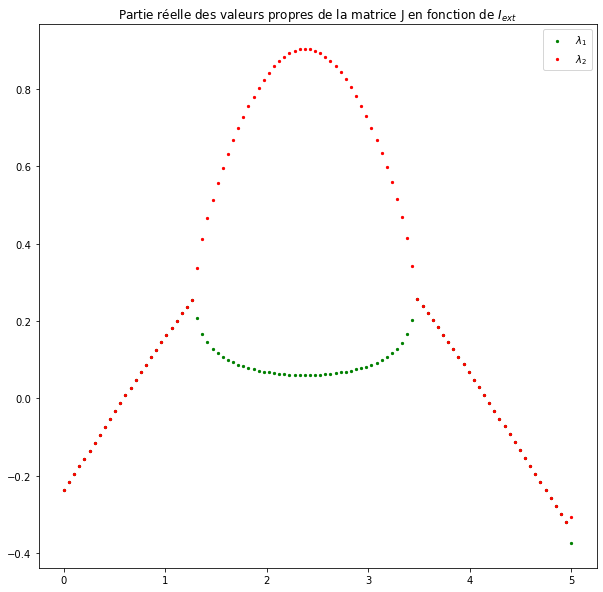

In [57]:
L1 = []
L2 = []

I_range = np.linspace(0, 5, 100)
b = 0.4
tau = 11

for I in I_range:
    v0, w0 = find_equi_point(I)
    
    trJ = 1 - v0**2 - b/tau
    detJ = (b*(v0**2 - 1) + 1) / tau
    
    D = trJ**2 - 4*detJ
    
    if D >= 0:
        l1 = (trJ - np.sqrt(D))/2
        l2 = (trJ + np.sqrt(D))/2
    else:
        l1 = trJ/2
        l2 = trJ/2
    
    L1.append(l1)
    L2.append(l2)

plt.figure(figsize=(10,10))
plt.scatter(I_range, L1, color='green', s=5, label='$\lambda_1$')
plt.scatter(I_range, L2, color='red', s=5, label= '$\lambda_2$')
plt.title("Partie réelle des valeurs propres de la matrice J en fonction de $I_{ext}$")
plt.legend()
plt.show()

# III - Implémentation des méthodes numériques pour 1 neurone

## III.1 - Méthode d'Euler explicite 

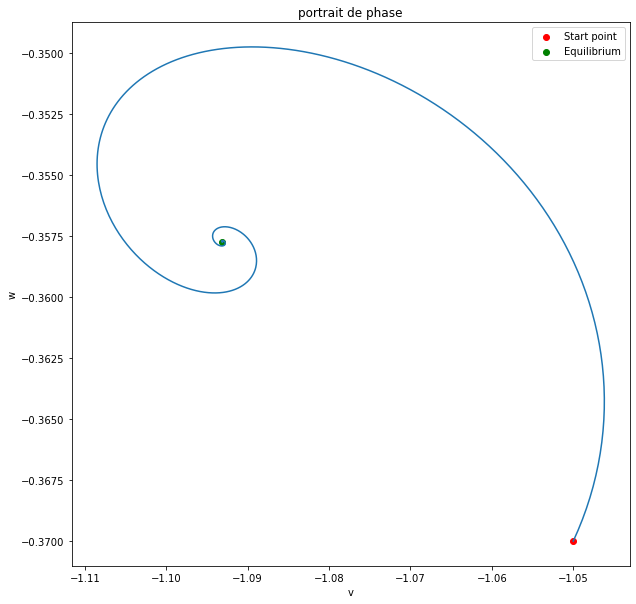

In [76]:
# faire varier I pour obtenir les différents tracés possibles 
I = 0.3

def dervv(v,w):
    return v - v**3/3 -w + I

def dervw(v,w):
    return (v + a - b*w)/tau

def euler_explicite(v0, w0, tmin, tmax, h):
    t = [0]
    v = [v0]
    w = [w0]
    tk = tmin
    dv = v0
    dw = w0
    while tk<=tmax:
        tk+=h
        t.append(tk)
        dv+=dervv(dv,dw)*h
        dw+=dervw(dv,dw)*h
        v.append(dv)
        w.append(dw)
        
    return t, v, w


start_point = [-1.05, -0.37]
equi_point = find_equi_point(I)
t,v,w = euler_explicite(-1.05,-0.37, 0, 1000,0.1)

plt.figure(figsize=(10,10))
plt.plot(v,w)
plt.xlabel('v')
plt.ylabel('w')
plt.scatter(start_point[0], start_point[1], color='red', label='Start point')
plt.scatter(equi_point[0], equi_point[1], color='green', label='Equilibrium')
plt.title('portrait de phase')
plt.legend()
plt.show()

## III.2 - Implémentation de Runge-Kutta 

In [59]:
def fonct(y, t, a, b, I, tau):
    return np.array([y[0] - y[0]**3/3 - y[1] + I, (y[0] + a - b*y[1])/tau])


def rungekutta1(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] + (t[i+1] - t[i]) * f(y[i], t[i], *args)
    return y

def rungekutta2(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + h * f(y[i] + f(y[i], t[i], *args) * h / 2., t[i] + h / 2., *args)
    return y

def rungekutta4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

def fonct2(y, a, b, I, tau):
    return np.array([y[0] - y[0]**3/3 - y[1] + I, (y[0] + a - b*y[1])/tau])

def rungekutta1_step(f, y0, start, end, h, args=()):
    n = int(abs(start - end)/h)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] + h*f(y[i], *args)
    return y

# méthode de Heun 

def rungekutta2_step(f, y0, start, end, h, args=()):
    n = int(abs(start - end)/h)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] + h * f(y[i] + f(y[i], *args) * h/2, *args)
    return y


## c,b choisis comme pour simpson 

def rungekutta4_step(f, y0, start, end, h, args=()):
    n = int(abs(start - end)/h)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    c = np.zeros(4)
    for i in range(n - 1):
        k1 = f(y[i], *args)
        k2 = f(y[i] + k1 * h/2, *args)
        k3 = f(y[i] + k2 * h/2, *args)
        k4 = f(y[i] + k3 * h, *args)
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        

    return y

### Tracés pour Runge-Kutta $q=2$

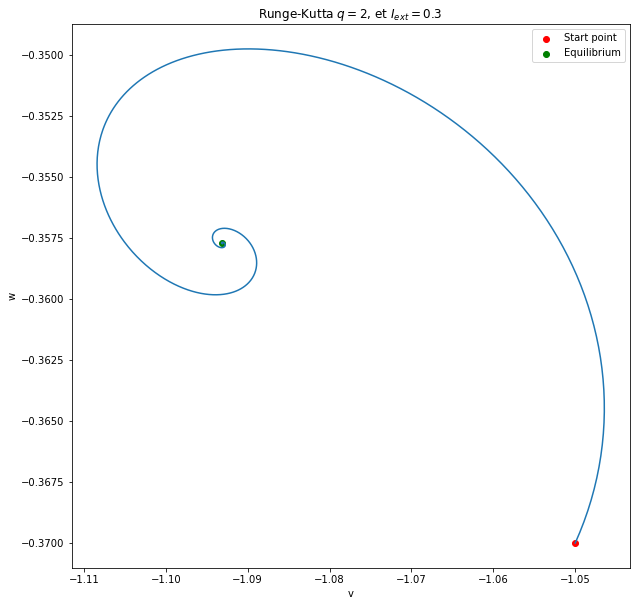

In [77]:
I = 0.3

T = np.arange(0, 10000, 0.01)

start_point = [-1.05, -0.37]
#start_point = [0, 0]
start = 0
end = 400
step = 0.05
X = rungekutta2_step(fonct2, start_point, start, end, step,  args = (0.95, 0.4, I, 11))

equi_point = find_equi_point(I)

plt.figure(figsize=(10,10))
plt.scatter(start_point[0], start_point[1], color='red', label='Start point')
plt.scatter(equi_point[0], equi_point[1], color='green', label='Equilibrium')
plt.plot(X[:, 0], X[:, 1])
plt.xlabel('v')
plt.ylabel('w')
plt.title("Runge-Kutta $q=2$, et $I_{ext} =$" +str(I))
plt.legend()
plt.show()

### Tracés pour Runge-Kutta $q=4$ :

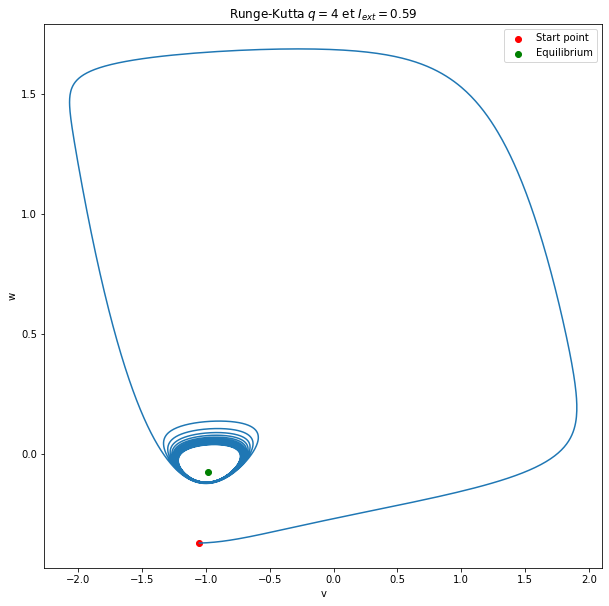

In [78]:
I = 0.59

start_point = [-1.05, -0.37]
#start_point = [0, 0]
start = 0
end = 400
step = 0.05
X = rungekutta4_step(fonct2, start_point, start, end, step,  args = (0.95, 0.4, I, 11))

equi_point = find_equi_point(I)

plt.figure(figsize=(10,10))
plt.scatter(start_point[0], start_point[1], color='red', label='Start point')
plt.scatter(equi_point[0], equi_point[1], color='green', label='Equilibrium')
plt.plot(X[:, 0], X[:, 1])
plt.xlabel('v')
plt.ylabel('w')
plt.title("Runge-Kutta $q=4$ et $I_{ext} = $"+str(I))
plt.legend()
plt.show()

# IV - Implémentation avec deux neurones

La résolution numérique précédente faisait intervenir les équations pour un seul neurone, nous pouvons maintenant nous intéresser à l'interaction entre deux neurones 

Pour le second neurone, $I_{ext}(t) = v_{neurone_1}(t)$.

## IV.1 - Euler explicite 

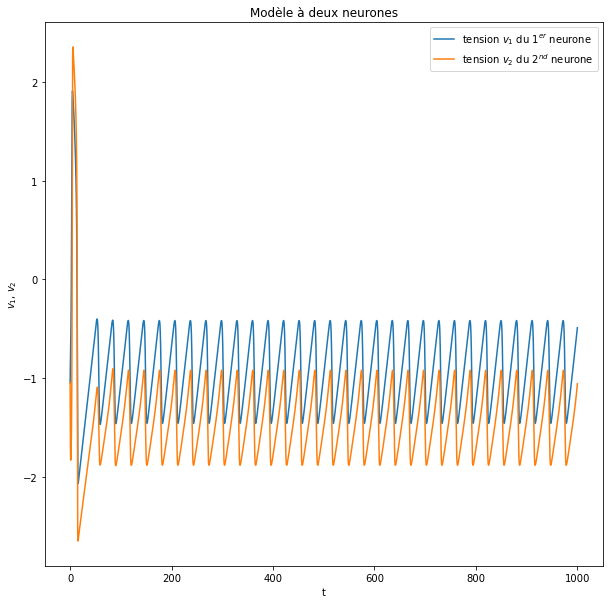

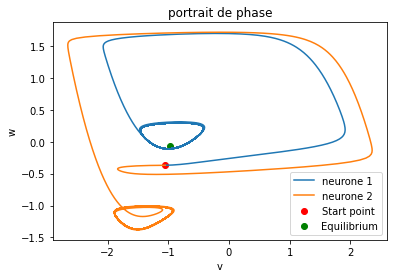

In [79]:
# faire varier I pour obtenir les différents tracés possibles 
I = 0.6

def dervv(v,w,I):
    return v - v**3/3 -w + I

def dervw(v,w):
    return (v + a - b*w)/tau

def euler_explicite_2n(v_10, w_10, v_20,w_20, tmin, tmax, h):
    t = [0]
    v_1 = [v_10]
    w_1 = [w_10]
    v_2 = [v_20]
    w_2 = [w_20]
    tk = tmin
    dv_1 = v_10
    dw_1 = w_10
    dv_2 = v_20
    dw_2 = w_20

    while tk<=tmax:
        tk+=h
        t.append(tk)
        dv_1+=dervv(dv_1,dw_1,I)*h
        dw_1+=dervw(dv_1,dw_1)*h
        v_1.append(dv_1)
        w_1.append(dw_1)
        
        dv_2+=dervv(dv_2,dw_2,dv_1)*h
        dw_2+=dervw(dv_2,dw_2)*h
        v_2.append(dv_2)
        w_2.append(dw_2)
    return t, v_1, w_1, v_2, w_2

t,v_1,w_1, v_2,w_2 = euler_explicite_2n(-1.05,-0.37,-1.05,-0.37,0, 1000,0.1)

plt.figure(figsize=(10,10))
plt.plot(t,v_1, label = 'tension $v_1$ du $1^{er}$ neurone')
plt.plot(t,v_2, label = 'tension $v_2$ du $2^{nd}$ neurone')
plt.title('Modèle à deux neurones')
plt.xlabel('t')
plt.ylabel('$v_1$, $v_2$')
plt.legend()
plt.show()

start_point = [-1.05, -0.37]
equi_point = find_equi_point(I)
plt.plot(v_1,w_1, label = 'neurone 1')
plt.plot(v_2,w_2, label = 'neurone 2')
plt.scatter(start_point[0], start_point[1], color='red', label='Start point')
plt.scatter(equi_point[0], equi_point[1], color='green', label='Equilibrium')
plt.xlabel('v')
plt.ylabel('w')
plt.title('portrait de phase')
plt.legend()
plt.show()

## IV.2 - Runge-Kutta $q = 2$ : 

**NB** : Idem pour Runge-Kutta $q = 4$, il suffit de faire le plot en utilisant la fonction ```rungekutta4_step_2neurone```.

In [63]:
def fonct(y, t, a, b, I, tau):
    return np.array([y[0] - y[0]**3/3 - y[1] + I, (y[0] + a - b*y[1])/tau])

def fonct2(y, a, b, I, tau):
    return np.array([y[0] - y[0]**3/3 - y[1] + I, (y[0] + a - b*y[1])/tau])


# méthode de Heun 

def rungekutta2_step_2neurones(f, y_10, y_20, start, end, h):
    n = int(abs(start - end)/h)
    y_1 = np.zeros((n, len(y0)))
    y_2 = np.zeros((n, len(y0)))
    y_1[0] = y_10
    y_2[0] = y_20
    for i in range(n - 1):
        y_1[i+1] = y_1[i] + h*f(y_1[i], 0.95, 0.4, I, 11)
        y_2[i+1] = y_2[i] + h*f(y_2[i],0.95, 0.4, y_1[i][0], 11)
    return y_1,y_2


## c,b choisis comme pour simpson 

def rungekutta4_step_2neurones(f, y_10,y_20, start, end, h):
    n = int(abs(start - end)/h)
    y_1 = np.zeros((n, len(y_10)))
    y_2 = np.zeros((n, len(y_20)))
    y_1[0] = y_10
    y_2[0] = y_20
    c = np.zeros(4)
    for i in range(n - 1):
        k1_1 = f(y_1[i], 0.95, 0.4, I, 11)
        k2_1 = f(y_1[i] + k1_1 * h/2,0.95, 0.4, I, 11)
        k3_1 = f(y_1[i] + k2_1 * h/2, 0.95, 0.4, I, 11)
        k4_1 = f(y_1[i] + k3_1 * h,0.95, 0.4, I, 11)
        y_1[i+1] = y_1[i] + (h/6) * (k1_1 + 2*k2_1 + 2*k3_1 + k4_1)
        
        k1_2 = f(y_2[i],0.95, 0.4, y_1[i][0], 11)
        k2_2 = f(y_2[i] + k1_2 * h/2,0.95, 0.4, y_1[i][0], 11)
        k3_2 = f(y_1[i] + k2_2 * h/2,0.95, 0.4, y_1[i][0], 11)
        k4_2 = f(y_1[i] + k3_2 * h,0.95, 0.4, y_1[i][0], 11)
        y_2[i+1] = y_2[i] + (h/6) * (k1_2 + 2*k2_2 + 2*k3_2 + k4_2)
        
    return y_1,y_2

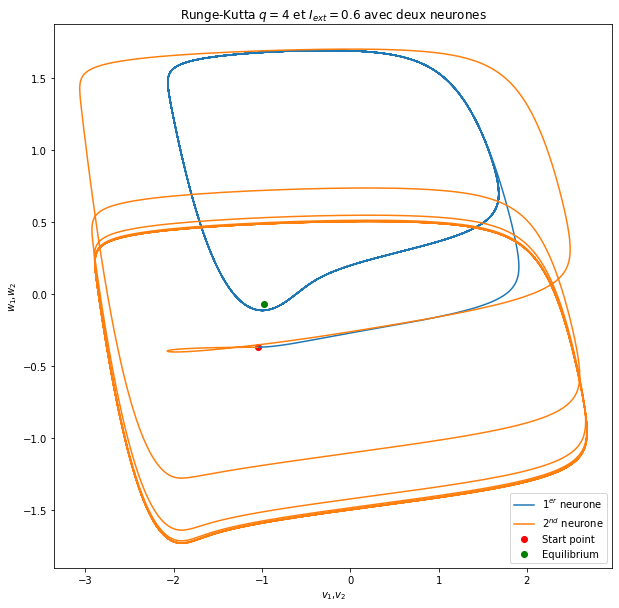

In [82]:
I = 0.6
start_point = [-1.05, -0.37]
#start_point = [0, 0]
start = 0
end = 400
step = 0.05
X1,X2 = rungekutta4_step_2neurones(fonct2, start_point, start_point, start, end, step)

equi_point = find_equi_point(I)

plt.figure(figsize=(10,10))
plt.scatter(start_point[0], start_point[1], color='red', label='Start point')
plt.scatter(equi_point[0], equi_point[1], color='green', label='Equilibrium')
plt.plot(X1[:, 0], X1[:, 1], label = '$1^{er}$ neurone')
plt.plot(X2[:,0],X2[:,1], label = '$2^{nd}$ neurone')
plt.title("Runge-Kutta $q=4$ et $I_{ext} = $"+str(I) + " avec deux neurones")
plt.xlabel('$v_1$,$v_2$')
plt.ylabel('$w_1$,$w_2$')
plt.legend()
plt.show()

# V - Erreur, temps de convergence et pas 

In [65]:
start = 0
end = 400
ref = rungekutta4_step(fonct2, [0, 0], start, end, 0.001,  args = (0.95, 0.4, I, 11))

def error(x):
    T = int(len(ref)/len(x))
    
    x_padded = []
    
    for value in x:
        for _ in range(T):
            x_padded.append(value)
    
    while len(x_padded) != len(ref):
        x_padded.append(x[-1])
    
    x_padded = np.array(x_padded)
    
    e1 = max(abs(x_padded[:, 0] - ref[:, 0]))
    e2 = max(abs(x_padded[:, 1] - ref[:, 1]))
    
    return e1 + e2

errors1 = []
time1 = []
errors2 = []
time2 = []
errors4 = []
time4 = []
step_range = np.arange(0.01, 0.8, 0.01)

for step in step_range:
    t0 = time.time()
    x1 = rungekutta1_step(fonct2, [0, 0], start, end, step,  args = (0.95, 0.4, I, 11))
    t1 = time.time()
    time1.append(t1 - t0)
    
    t0 = time.time()
    x2 = rungekutta2_step(fonct2, [0, 0], start, end, step,  args = (0.95, 0.4, I, 11))
    t1 = time.time()
    time2.append(t1 - t0)
    
    t0 = time.time()
    x4 = rungekutta4_step(fonct2, [0, 0], start, end, step,  args = (0.95, 0.4, I, 11))
    t1 = time.time()
    time4.append(t1 - t0)
    
    
    errors1.append(error(x1))
    errors2.append(error(x2))
    errors4.append(error(x4))

### Erreur des méthodes

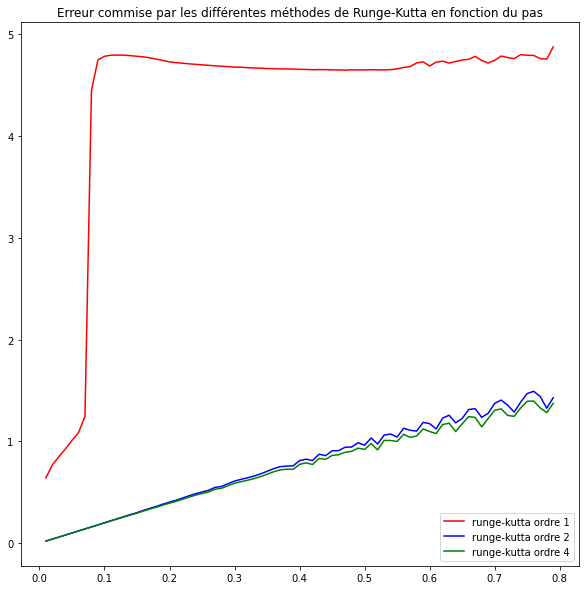

In [66]:
 
    
plt.figure(figsize=(10,10))
plt.plot(step_range, errors1, color='red', label='runge-kutta ordre 1')
plt.plot(step_range, errors2, color='blue', label='runge-kutta ordre 2')
plt.plot(step_range, errors4, color='green', label='runge-kutta ordre 4')
plt.title("Erreur commise par les différentes méthodes de Runge-Kutta en fonction du pas")
plt.legend()
plt.show()

### Temps de calcul des méthodes

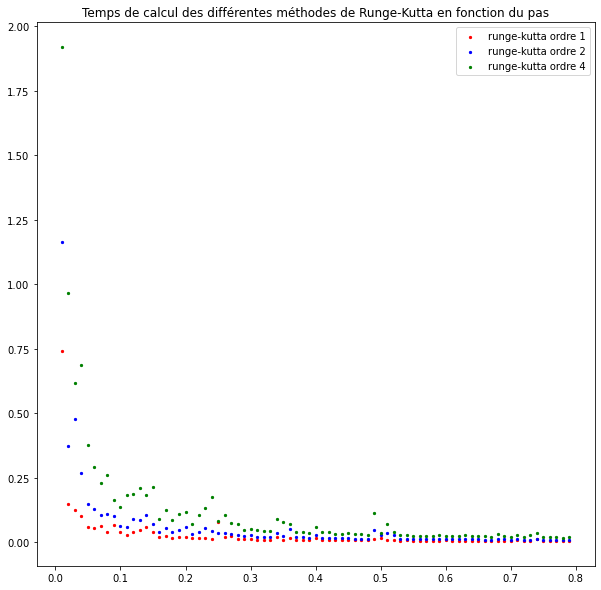

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(step_range, time1, color='red', s=5, label='runge-kutta ordre 1')
plt.scatter(step_range, time2, color='blue', s=5, label='runge-kutta ordre 2')
plt.scatter(step_range, time4, color='green', s=5, label='runge-kutta ordre 4')
plt.title("Temps de calcul des différentes méthodes de Runge-Kutta en fonction du pas")
plt.legend()
plt.show()

### Tradeoff 

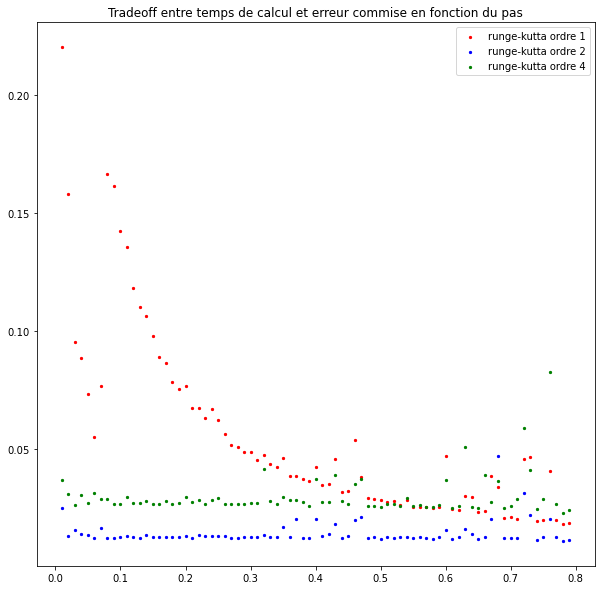

In [67]:
tradeoff1 = np.array(errors1) * np.array(time1)
tradeoff2 = np.array(errors2) * np.array(time2)
tradeoff4 = np.array(errors4) * np.array(time4)

plt.figure(figsize=(10,10))
plt.scatter(step_range, tradeoff1, color='red', s=5, label='runge-kutta ordre 1')
plt.scatter(step_range, tradeoff2, color='blue', s=5, label='runge-kutta ordre 2')
plt.scatter(step_range, tradeoff4, color='green', s=5, label='runge-kutta ordre 4')
plt.title("Tradeoff entre temps de calcul et erreur commise en fonction du pas")
plt.legend()
plt.show()

# VI - Calcul des constantes de stabilité des méthodes

In [48]:
def constante_lambda(k,b, a, q, hmax):
    alpha = 0 
    cste = 0
    s = 0
    l = 0
    r = 0
    for i in range(q):
        for j in range(i+1):
            s += abs(a[i][j])
        if (alpha<s):
            alpha = s
        s = 0
    for i in range(q):
        for j in range(r,i+1):
            l += (alpha*k*hmax)**j
        r+=1
        cste += abs(b[j])*l
    return k*cste

#RK1
b_1 = [1]
a_1 = [[0]]
print("Constante de stabilité méthode d'Euler : ", constante_lambda(1, b_1, a_1, 1, 0.01))

#RK2
b_2 = [0,1]
a_2 = [[0,0],[1/2,0]]
print("Constante de stabilité méthode de Runge-Kutta 2 : ", constante_lambda(1, b_2, a_2, 2, 0.01))

#RK4
b_4 = [1/6, 1/3, 1/3, 1/6]
a_4 = [[0,0,0,0], [1/2,0,0,0],[0,1/2,0,0],[0,0,1,0]]
print("Constante de stabilité méthode de Runge-Kutta 4 : ",constante_lambda(1, b_4, a_4, 4, 0.01))

Constante de stabilité méthode d'Euler :  1.0
Constante de stabilité méthode de Runge-Kutta 2 :  1.005
Constante de stabilité méthode de Runge-Kutta 4 :  1.0083834999999999
